# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

### Import Libraries

In [41]:
import pandas as pd
% matplotlib inline
import matplotlib.pyplot as plt
import numpy as np 
import pylab 
import scipy.stats as stats

# Read in data
df = pd.read_csv('data/human_body_temperature.csv')

### Normality Test

* Visualize the distribution in a histogram
* Visualize the distribution using a q-q plot
* Perform a normality hypothesis test

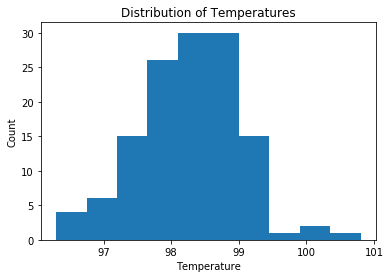

In [98]:
# Plot historgram of temperatures

plt.hist(df.temperature)
plt.title("Distribution of Temperatures")
plt.xlabel("Temperature")
plot = plt.ylabel("Count")

The above histogram appears approximately normal, but also has a drastic cuttoff around 99.3F, so it is worth running a few more checks for normality.

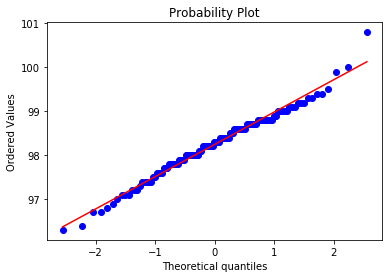

In [50]:
# Q-Q Plot
stats.probplot(df.temperature, dist="norm", plot=pylab)
pylab.show()

The Q-Q plot above seems to indicate that temperatures in this data set are approximately normally distributed. Let's move from checking this visually to testing normality quantitatively.

In [176]:
# Run a normality test
norm_test = stats.normaltest(df.temperature)
print("Hypotheses")
print("H0: Distribution is normal")
print("H1: Distribution is not normal")
print("Alpha = 0.05")
print(" ")
print("With a t-statistic of %.4f resulting in a p-value of %.4f, we conclude that we cannot reject the null hypothesis that \ntemperatures in this dataset are normally distributed." % norm_test)

Hypotheses
H0: Distribution is normal
H1: Distribution is not normal
Alpha = 0.05
 
With a t-statistic of 2.7038 resulting in a p-value of 0.2587, we conclude that we cannot reject the null hypothesis that 
temperatures in this dataset are normally distributed.


### Checking CLT Conditions

In [177]:
# Get the overall sample size and sample sizes by gender
sample_size = len(df.temperature)
gender_counts = df.gender.value_counts()
print('The sample size is %d split evenly between %d males and %d females.' % (sample_size, gender_counts[0], gender_counts[1]))

The sample size is 130 split evenly between 65 males and 65 females.


Since the data meets the normality condition and are unimodal, a sample size over 30 is sufficient to meet the sample size condition of CLT. The data were collected through a random sample, and can therefore be assumed to be independent. However, more investigation into the experiment design is necessary to see if the sample meets the 10% condition. Additionally, while we are assuming that the data are independent, it is worth noting that the sample was taken from a single location (Baltimore, MD) and, therefore, results cannot reasonably be extrapolated to the entire world, or even U.S., populations.

### Test for True Population Mean

As we are testing a single statistic (sample mean) against a hypothesized population parameter (population mean), a one-sample test is appropriate. Since the population standard deviation is unknown, we will use a t-test. 

In [122]:
# Get the sample mean temperature
samp_mean = df.temperature.mean()
print("The sample mean temperature is %.2f." % samp_mean)
print(" ")
print("Hypotheses")
print("H0: Mean Temperature is 98.6")
print("H1: Mean Temperature is Below 98.6")
print("Alpha = 0.05")

The sample mean temperature is 98.25.
 
Hypotheses
H0: Mean Temperature is 98.6
H1: Mean Temperature is Below 98.6
Alpha = 0.05


In [178]:
# Run a one-sample t-test
hypothesized_mean = 98.6
t_test = stats.ttest_1samp(df.temperature, hypothesized_mean)
print("With a t-statistic of %.4f and a p-value of %.10f, we can reject the null hypothesis that the true population mean is %.2f." % (t_test[0], t_test[1], hypothesized_mean))

With a t-statistic of -5.4548 and a p-value of 0.0000002411, we can reject the null hypothesis that the true population mean is 98.60.


In [179]:
# Create a 95% a confidence interval
conf_lev = 0.95
n = len(df.temperature) - 1
SEM = stats.sem(df.temperature)
conf_interval = stats.t.interval(conf_lev, n, 
                             loc = samp_mean, 
                             scale=SEM)
print("The lower bound of a 95-percent confidence interval is %.2f and the upper bound is %.2f." % conf_interval )

The lower bound of a 95-percent confidence interval is 98.12 and the upper bound is 98.38.


### Abnormality Thresholds

It is possible to use the confidence interval above as our thresholds outside of which would be considered abnormal. However, depending on the use case, it may be more appropriate to apply more extreme thresholds such as the outlier formula below. 

In [138]:
# Get the values needed for outlier calculation
IQR = stats.iqr(df.temperature)
Q3 = np.percentile(df.temperature, 75)
Q1 = np.percentile(df.temperature, 25)
upper_thresh = Q3 + (1.5*IQR)
lower_thresh = Q1 - (1.5*IQR)
print("This would put the lower threshold at %.2f and the upper threshold at %.2f." % (lower_thresh, upper_thresh))

This would put the lower threshold at 96.45 and the upper threshold at 100.05.


### Gender Comparison Test

In [139]:
# Get the average temperatures of genders separately
avg_male_temp = df.temperature[df.gender == "M"].mean()
avg_female_temp = df.temperature[df.gender == "F"].mean()

print("The average temperatures for males and females are %.2f and %.2f, respectively." % (avg_male_temp, avg_female_temp))

The average temperatures for males and females are 98.10 and 98.39, respectively.


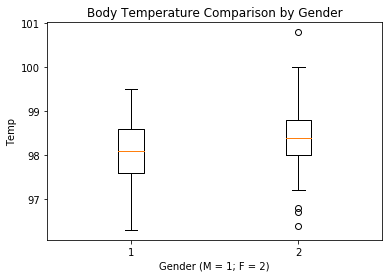

In [168]:
# Visualize comparison
plt.boxplot([df.temperature[df.gender == "M"], df.temperature[df.gender == 'F']])
plt.title("Body Temperature Comparison by Gender")
plt.xlabel("Gender (M = 1; F = 2)")
d = plt.ylabel("Temp")

The mean temperatures for males and females seem to be different. We will run a two-sample independent t-test to measure the difference quantitatively.

In [180]:
# Run two sample t-test
print("Hypotheses")
print("H0: Mean temperature is the same for both genders.")
print("H1: Mean temperatures differ between genders")
print("Alpa = 0.05")
print(" ")
ind_test = stats.ttest_ind(df.temperature[df.gender == "F"], df.temperature[df.gender == 'M'])
print("With a t-statistic of %.4f and a p-value of %.4f, we can reject the null hypothesis that the mean temperature for males is the same as the mean temperature for females." % ind_test)

Hypotheses
H0: Mean temperature is the same for both genders.
H1: Mean temperatures differ between genders
Alpa = 0.05
 
With a t-statistic of 2.2854 and a p-value of 0.0239, we can reject the null hypothesis that the mean temperature for males is the same as the mean temperature for females.


While there is a statistically significant difference between mean body temperatures for males as compared to that of females, the actual difference is relatively small. When reporting the results of this test, it is important to note the effect size as to avoid any misinterpretation of the findings.